In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import plotly.express as px
import folium
from folium.plugins import HeatMap
from pathlib import Path

# Configuração visual profissional
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Carga dos dados (subindo um nível para achar a pasta data)
DATA_PATH = Path("../data/processed/listings_enriched.parquet")
df = pd.read_parquet(DATA_PATH)

print(f"Dados carregados: {df.shape[0]} imóveis prontos para análise.")

Dados carregados: 14874 imóveis prontos para análise.


In [2]:
df.shape

(14874, 24)

In [3]:
df.columns

Index(['id', 'name', 'neighbourhood_cleansed', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms_text',
       'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights',
       'number_of_reviews', 'review_scores_rating', 'reviews_per_month',
       'bathrooms', 'estimated_occupancy_days', 'estimated_monthly_revenue',
       'has_pool', 'has_ac', 'has_kitchen', 'has_workspace'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14874 entries, 0 to 14873
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         14874 non-null  int64  
 1   name                       14874 non-null  object 
 2   neighbourhood_cleansed     14874 non-null  object 
 3   latitude                   14874 non-null  float64
 4   longitude                  14874 non-null  float64
 5   property_type              14874 non-null  object 
 6   room_type                  14874 non-null  object 
 7   accommodates               14874 non-null  int64  
 8   bathrooms_text             14859 non-null  object 
 9   bedrooms                   14853 non-null  float64
 10  beds                       14865 non-null  float64
 11  amenities                  14874 non-null  object 
 12  price                      14874 non-null  float64
 13  minimum_nights             14874 non-null  int

In [5]:
df.apply(lambda col: col.unique()[:5])

id                                         [26654, 27423, 40701, 44452, 44469]
name                         [World Class @ CN Tower, convention centre, Th...
neighbourhood_cleansed       [Waterfront Communities-The Island, South Rive...
latitude                     [43.64608, 43.66884, 43.67239, 43.67193, 43.67...
longitude                    [-79.39032, -79.32725, -79.28858, -79.3859, -7...
property_type                [Entire condo, Entire rental unit, Private roo...
room_type                    [Entire home/apt, Private room, Shared room, H...
accommodates                                                   [4, 1, 2, 3, 5]
bathrooms_text               [1 bath, 1 private bath, Half-bath, 2 baths, 4...
bedrooms                                             [2.0, 0.0, 1.0, 3.0, 4.0]
beds                                                 [2.0, 1.0, 0.0, 3.0, 4.0]
amenities                    [["Private entrance", "Carbon monoxide alarm",...
price                                          [133.

In [6]:
with pd.option_context("float_format", "{:.2f}".format, "display.max_columns", 35):
    display(df.describe())

,id,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,number_of_reviews,review_scores_rating,reviews_per_month,bathrooms,estimated_occupancy_days,estimated_monthly_revenue,has_pool,has_ac,has_kitchen,has_workspace
count,14874.00,14874.00,14874.00,14874.00,14853.00,14865.00,14874.00,14874.00,14874.00,11915.00,14874.00,14792.00,14874.00,14874.00,14874.00,14874.00,14874.00,14874.00
mean,843288731057750784.00,43.69,-79.40,3.09,1.38,1.70,137.35,21.88,34.62,4.79,1.30,1.24,10.80,1458.18,0.17,0.98,0.93,0.64
std,565116463789292672.00,0.05,0.07,1.83,0.82,1.02,79.83,27.53,66.67,0.38,1.84,0.54,9.24,1598.51,0.37,0.15,0.25,0.48
min,26654.00,43.59,-79.64,1.00,0.00,0.00,12.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,52588016.00,43.65,-79.43,2.00,1.00,1.00,73.00,2.00,1.00,4.75,0.07,1.00,2.17,207.52,0.00,1.00,1.00,0.00
50%,1004248458944389120.00,43.67,-79.40,2.00,1.00,1.00,119.00,28.00,9.00,4.89,0.45,1.00,8.72,997.92,0.00,1.00,1.00,1.00
75%,1326110144377534976.00,43.72,-79.37,4.00,2.00,2.00,186.00,28.00,40.00,5.00,1.93,1.00,19.14,2178.00,0.00,1.00,1.00,1.00
max,1551189432035235584.00,43.84,-79.12,16.00,10.00,11.00,388.00,888.00,1287.00,5.00,34.05,20.00,25.00,9675.00,1.00,1.00,1.00,1.00


In [7]:
df.isnull().sum()

id                              0
name                            0
neighbourhood_cleansed          0
latitude                        0
longitude                       0
property_type                   0
room_type                       0
accommodates                    0
bathrooms_text                 15
bedrooms                       21
beds                            9
amenities                       0
price                           0
minimum_nights                  0
number_of_reviews               0
review_scores_rating         2959
reviews_per_month               0
bathrooms                      82
estimated_occupancy_days        0
estimated_monthly_revenue       0
has_pool                        0
has_ac                          0
has_kitchen                     0
has_workspace                   0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

C:\Users\gzuch\AppData\Local\Temp\ipykernel_34192\3667103545.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df_numeric[numeric[i]], shade=True, color='b')
C:\Users\gzuch\AppData\Local\Temp\ipykernel_34192\3667103545.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df_numeric[numeric[i]], shade=True, color='b')
C:\Users\gzuch\AppData\Local\Temp\ipykernel_34192\3667103545.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df_numeric[numeric[i]], shade=True, color='b')
C:\Users\gzuch\AppData\Local\Temp\ipykernel_34192\3667103545.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting 

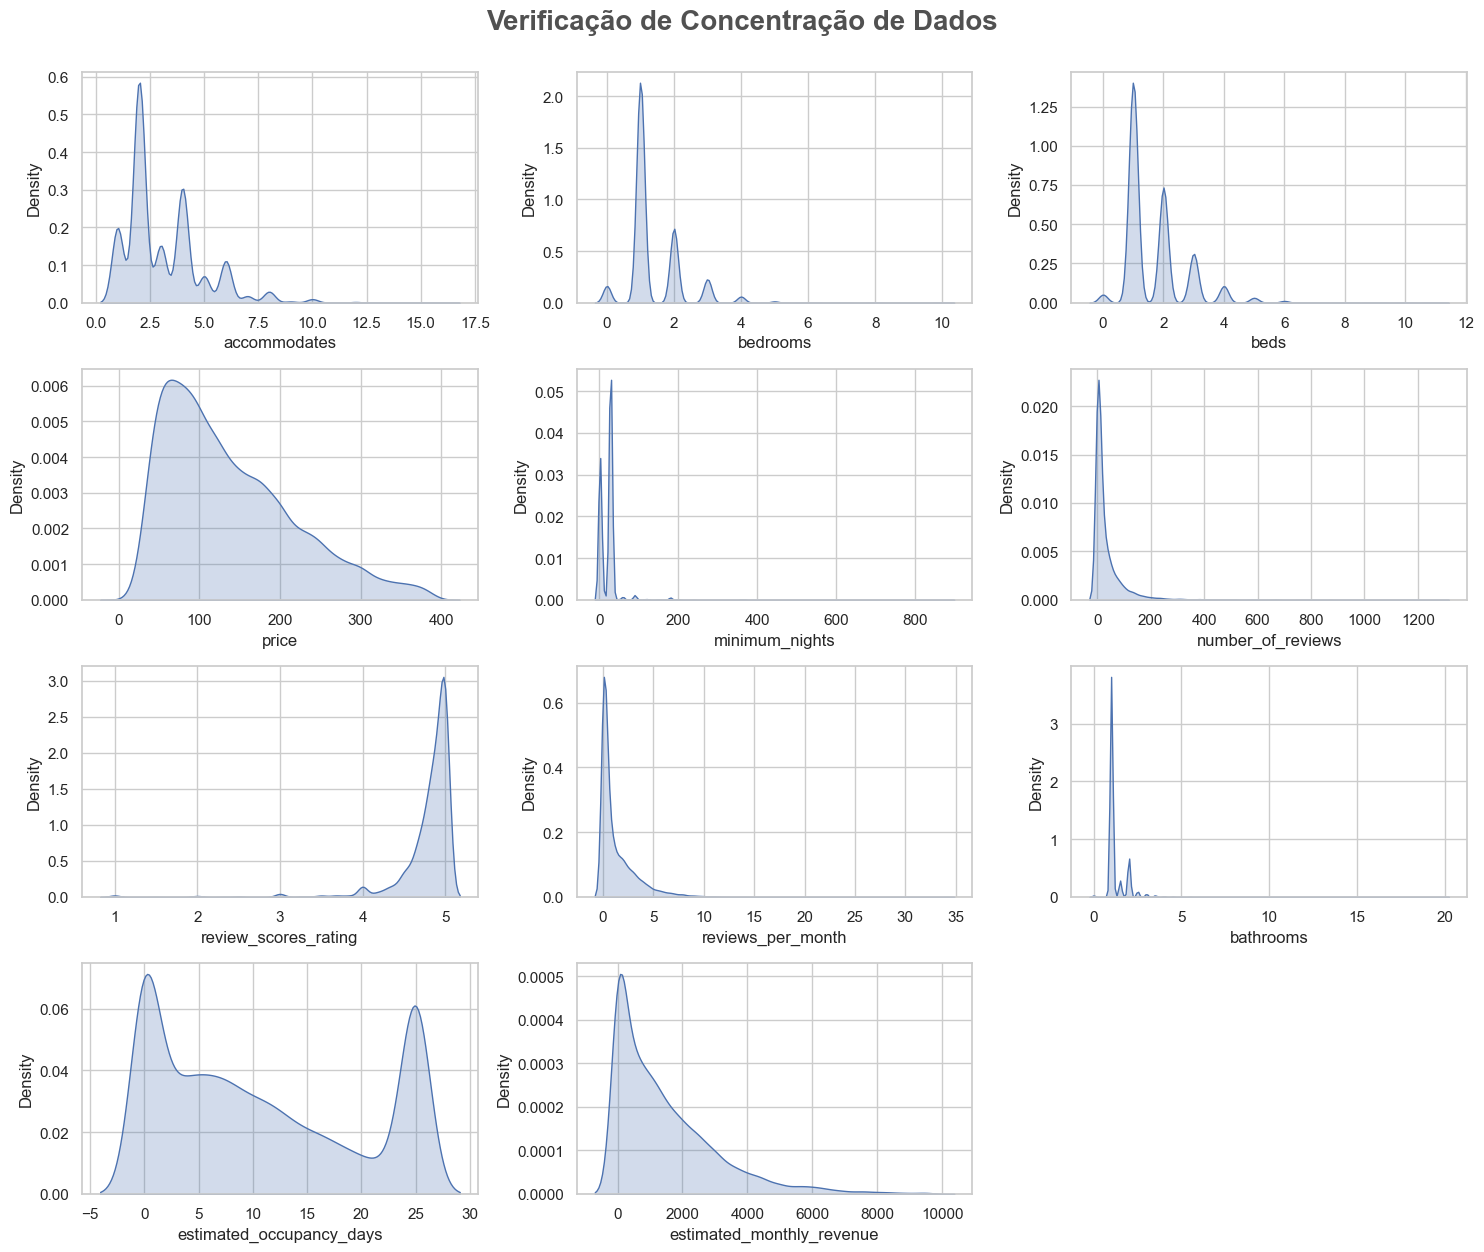

In [9]:
# Removendo colunas não necessárias para verificação de valores
remover = ['id', 'name', 'neighbourhood_cleansed', 'latitude', 'longitude',
       'property_type', 'room_type','bathrooms_text',
         'amenities', 'has_pool', 'has_ac', 'has_kitchen', 'has_workspace']
df_numeric = df.drop(columns=remover)

# Identificar as colunas numéricas do dataframe
numeric = df_numeric.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Gerar os gráficos
plt.figure(figsize=(15, 15))
plt.suptitle("Verificação de Concentração de Dados", fontsize=20, fontweight='bold', alpha=0.8, y=1)

for i in range(len(numeric)):
    plt.subplot(5, 3, i + 1)
    sns.kdeplot(x=df_numeric[numeric[i]], shade=True, color='b')
    plt.xlabel(numeric[i])
    plt.tight_layout()

plt.show()